# Notes / Summary

1. Having a good understanding of how things work can help you quickly home in on the appropriate model \
the right algorithm to use, and a agood set of hyperparameters for your task.
2. understanding what's under the hood will also help you debug issues and perform error analysis more efficiently.
3. lastly most of the topics discussed in this chapter will be essential in understanding, building and training NN


* On top of linear regression, we have polynomial regression, a more complex model that can fit nonline datasets.
* since this model has more parameters than linear regression, it is more prone to overfitting the training data.
* to check whether or not this is the case by using learning curves, and then we can use regularization to prevent overifiting


* learning algorithms will often optimize a different loss function during training than the performance measure used
* to evaluate the final model. this is generally because the function is easier to optimize and/or because 
* it has extra terms needed during training only e.g. for regularization
* A good performance metric is as close as possible to the final business objective.
* A good training loss is easy to optimize and strongly correlated with the metric
* For example, classifiers are often trained using a cost fucntion such as the log loss, but 
* evaluated using precision/recall. 
* The log lossis easy to minimize, and doing so weill usually improve precision / recall

# Required Libraries

In [53]:
import  numpy as np 

In [54]:
RS = 143 # random state

# Linear Regression

Equation :    
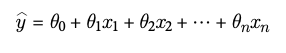

Vectorized equation:\


* to train a linear regression model, we need to find the value of theta that minimizes the RMSE
* in practise it is simpler to minimize the mean squared error (MSE) than the RMSE and it leads to the same result
* (becasue the value that minimizes a positive function also minimizes its square root)\
\
Normal equation: to find the value of theta that minimizes the MSE there exisats a closed form solution, math eqn.\
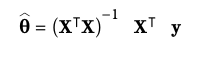



## the normal equation

In [55]:
np.random.seed(143) # to make this code example reproducible
num = 100 # number of instances
x = 2 * np.random.rand(num, 1) # column vector 
y = 4 + 3 * x + np.random.randn(num, 1 ) # column vector


In [56]:
## now lets compute theta using normal equation

from sklearn.preprocessing import  add_dummy_feature 
x_b = add_dummy_feature(x)
theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(x_b.T, x_b)), x_b.T), y)
# theta = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y ## above and this line both are the same in diff. reprsentations
theta

array([[3.98476171],
       [3.09535726]])

* the function we used to generate the data is y = 4 + 3x1 + gaussian noise
* theta generated is ; theta0 is 3.98, theta1 is 3.09, close to the acutal values of 4 and 3 
* it will never be same due to the gaussian noise, this made impossible to recover the exact parameters of the original function
* the smaller and noisier the dataset, the harder it gets

In [57]:
## now using the theta from above, lets predict some values

x_new = np.array([[0], [2]])
x_newb = add_dummy_feature(x_new)
y_predict = x_newb @ theta
y_predict

array([[ 3.98476171],
       [10.17547623]])

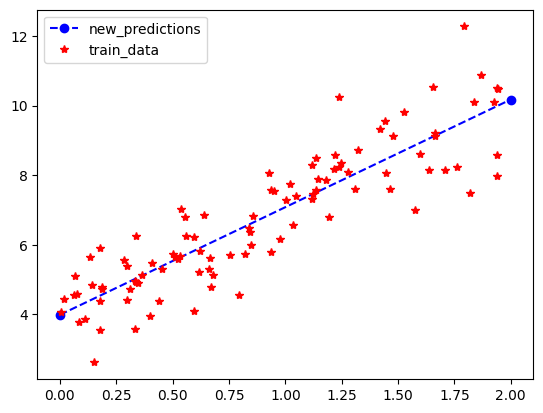

In [58]:
# lets plot the above 

import matplotlib.pyplot as plt

plt.plot(x_new, y_predict, 'ob--', label='new_predictions')
plt.plot(x, y, 'r*', label='train_data')
plt.legend()
plt.show()

Performing linear regression using scikit

In [59]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.98476171]), array([[3.09535726]]))

In [60]:
lin_reg.predict(x_new)

array([[ 3.98476171],
       [10.17547623]])

## SVD - singular value decomposition & pseudoinverse
* the above linear regression class from scikit learn uses pseudoinversel due to less time complexity
* the pseudoinverse itself is computed using a standard matrix factorization technique called singular value decomposition - SVD

## Computational complexity
* the normal equation , if you double the number of features, you multiply \
the computation **time by 8 times**
* using SVD / pseudoinverse method it will be **4 times**

# Gradient Descent
* Due to above time complexities, we try different methods to train a linear regression model
* This is better suited for cases where there are a larger number of featrues or too many data points
* Gradient Descent is an optimization algorithm used to minimize the cost function
* **what gradient descent does: it measures the local gradient of the error fucniton wrto parameter theta.**

* In practice, you start by filling θ with random values (this is called random initiali‐\
zation). Then you improve it gradually, taking one baby step at a time, each step\
attempting to decrease the cost function (e.g., the MSE), until the algorithm converges
to a minimum


* In gradient descent, the size of steps is the learning reat hyperparameter
* to small step and it will take a long time to converge
* to large step and it will overshoot the curves and sometimes it may never reach global minumum
* **two main challenges in gradient descent is 1.local minimum 2. Plateau**


* Fortunately, the MSE cost function for a linear regression model happens to be a\
convex function, which means that if you pick any two points on the curve, the line\
segment joining them is never below the curve. This implies that there are no local\
minima, just one global minimum. It is also a continuous function with a slope that\
never changes abruptly.2 These two facts have a great consequence: gradient descent\
is guaranteed to approach arbitrarily closely the global minimum (if you wait long\
enough and if the learning rate is not too high)\


* the cost function has the shape of a bowl, it can be an elongated bowl if the features have very different scales.

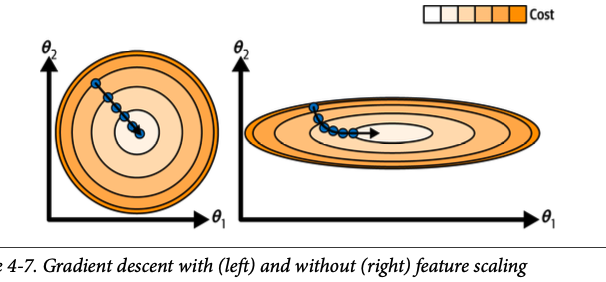
* left we can see gradient descent algorithm directly goes towards the minimum
* right side , it first goes in orthogonal direction to the global minimum and then changes towards the minimum.
* **when using gradient descent you should ensure that all features have a similar scale**

! **training a model means searching for a combination of model parameters that minimizes the cost function.**

## Batch Gradient Descent
* To implement gradient descent, you need to compute the gradient of the cost func‐\
tion with regard to each model parameter θj. In other words, you need to calculate\
how much the cost function will change if you change θj just a little bit. This is called\
a partial derivative. It is like asking, “What is the slope of the mountain under my\
feet if I face east”? and then asking the same question facing north \

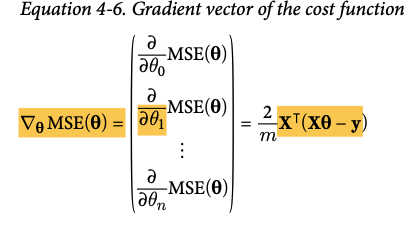
* Notice that this formula involves calculations over the full training\
set X, at each gradient descent step! This is why the algorithm is\
called batch gradient descent: it uses the whole batch of training\
data at every step   
* As a result, it is terribly slow on very large
training sets. 
* However, gradient descent scales well with the\
number of features; training a linear regression model when there\
are hundreds of thousands of features is much faster using gradient\
descent than using the Normal equation or SVD decomposition.

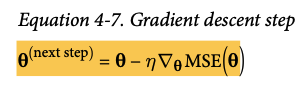


In [61]:
# BGD implementation

eta = 0.1 # learningrate
n_epocsh = 1000 # number of epochs; 
m = len(x_b)

np.random.seed(143)
theta = np.random.randn(2,1)

for epoch in range(n_epocsh):
    gradients = 2 / m * x_b.T @ ( x_b @ theta -y )
    theta = theta -eta* gradients # next step theta
theta

## the result almost similar to the normal equation and SVD implementation

array([[3.98476171],
       [3.09535726]])

* To find a good learning rate, you can use grid search, However, you \
may want to limit the number of epochs so that grid search can eliminate models that
take too long to converge.\

* how to set the number of epochs. If it is too low, you will still be\
far away from the optimal solution when the algorithm stops; but if it is too high,\
you will waste time while the model parameters do not change anymore. 
* A simple solution is to set a very large number of epochs but to interrupt the algorithm when\
the gradient vector becomes tiny—that is, when its norm becomes smaller than a\
**tiny number ϵ (called the tolerance)**—because this happens when gradient descent has
(almost) reached the minimum.

## Stochastic Gradient Descent (SGD)

* stochastic gradient descent picks a\
random instance in the training set at every step and computes the gradients based\
only on that single instance. 
* Obviously, working on a single instance at a time makes\
the algorithm much faster because it has very little data to manipulate at every
iteration. 
* It also makes it possible to train on huge training sets, since only one
instance needs to be in memory at each iteration
* **the final parameter values will be good, but not optimal.**

* With stochastic gradient descent, each training step is much faster but also
much more stochastic than when using batch gradient descent
* when cost function is very irregular, then SGD has a better chance of finding the global minimum than batch gradient descent
* randomness is good to escape local minimum, but it will never settle at the global minimum
* here we can gradually reduce the learning rate.
* the steps start out large then get smaller and smaller alloweing the algorithm to settle at the global minimum
* **this is called simulated annealing, the function that determines the learning rate at each iteration is learning schedule.**

### learning schedule

In [62]:
n_epochs = 50
t0, t1 = 5,50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        # gradient descent
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch *m + iteration)
        theta = theta - eta * gradients
        


* Note that since instances are picked randomly, some instances may be picked several\
times per epoch, while others may not be picked at all


* If you do not shuffle
the instances—for example, if the instances are sorted by label—\
then SGD will start by optimizing for one label, then the next, and\
so on, and it will not settle close to the global minimum.

In [63]:
# SGD regression from scikit
from sklearn.linear_model import SGDRegressor

sgd_regr = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, 
                        n_iter_no_change=100, random_state=RS)
sgd_regr.fit(x, y.ravel())
sgd_regr.intercept_, sgd_regr.coef_

(array([3.98551609]), array([3.09605942]))

## Mini batch Gradient Descent
* mini-batch GD com‐putes the gradients on small random sets of instances called mini-batches. 
* The main advantage of mini-batch GD over stochastic GD is that you can get a performance\
boost from hardware optimization of matrix operations, especially when using GPUs.
* mini-batch GD will end up walking around a bit closer to the minimum 
* than stochastic GD—but it may be harder for it to escape from local minima

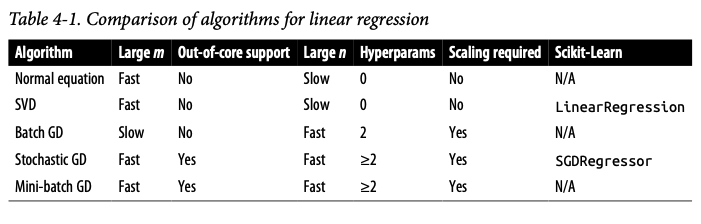

# Polynomial Regression
* Using a linear model to fit nonlinear data. A simple way to do this is to add powers of each\
feature as new features, then train a linear model on this extended set of features. This\
technique is called polynomial regression.

* use Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square (second- \
degree polynomial) of each feature in the training set as a new feature 

In [64]:
m = 100
x = 6 * np.random.rand(m,1) - 3
y = 0.5 * x ** 2 + x + 2 + np.random.randn(m,1)

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

xpoly = poly_features.fit_transform(x)
xpoly

array([[ 1.60262715e+00,  2.56841380e+00],
       [-2.88445612e+00,  8.32008713e+00],
       [ 2.70584094e+00,  7.32157519e+00],
       [-8.55280510e-01,  7.31504751e-01],
       [ 1.47769686e+00,  2.18358801e+00],
       [ 1.53071010e+00,  2.34307342e+00],
       [ 1.09862917e+00,  1.20698605e+00],
       [ 1.04209453e+00,  1.08596101e+00],
       [ 2.46005103e+00,  6.05185107e+00],
       [ 2.71494956e-01,  7.37095109e-02],
       [ 8.81358486e-01,  7.76792780e-01],
       [-1.79352130e+00,  3.21671864e+00],
       [ 1.76632389e+00,  3.11990008e+00],
       [-3.05450638e-01,  9.33000921e-02],
       [ 1.57713291e+00,  2.48734823e+00],
       [ 1.07936564e+00,  1.16503019e+00],
       [ 1.61253254e+00,  2.60026118e+00],
       [ 1.15114915e+00,  1.32514438e+00],
       [-2.73279207e-01,  7.46815248e-02],
       [ 2.57176316e+00,  6.61396576e+00],
       [-1.03265486e+00,  1.06637605e+00],
       [ 2.09160847e+00,  4.37482601e+00],
       [-2.58113164e+00,  6.66224054e+00],
       [ 6.

In [65]:
lin_reg = LinearRegression()
lin_reg.fit(xpoly, y)
lin_reg.intercept_, lin_reg.coef_


(array([1.61740614]), array([[1.02288352, 0.5717096 ]]))

Beware of the
combinatorial explosion of the number of features!

# End